In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Importing all the required Datasets

In [2]:
book_tags = pd.read_csv(r'D:\ML_workspace\Recommendation_system\Datasets\book_tags.csv')
books = pd.read_csv(r'D:\ML_workspace\Recommendation_system\Datasets\books.csv')
ratings = pd.read_csv(r'D:\ML_workspace\Recommendation_system\Datasets\ratings.csv')
tags = pd.read_csv(r'D:\ML_workspace\Recommendation_system\Datasets\tags.csv')
to_read = pd.read_csv(r'D:\ML_workspace\Recommendation_system\Datasets\to_read.csv')

In [3]:
print("'book_tags' dataset-columns: {} --------> shape = {}".format(list(book_tags.columns), book_tags.shape))
print('\n')
print("'books' dataset-columns: {}  --------> shape = {}".format(list(books.columns), books.shape))
print('\n')
print("'ratings' dataset-columns: {}  --------> shape = {}".format(list(ratings.columns), ratings.shape))
print('\n')
print("'tags' dataset-columns: {}  --------> shape = {}".format(list(tags.columns), tags.shape))
print('\n')
print("'to_read' dataset-columns: {}  --------> shape = {}".format(list(to_read.columns), to_read.shape))

'book_tags' dataset-columns: ['goodreads_book_id', 'tag_id', 'count'] --------> shape = (999912, 3)


'books' dataset-columns: ['book_id', 'goodreads_book_id', 'best_book_id', 'work_id', 'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year', 'original_title', 'title', 'language_code', 'average_rating', 'ratings_count', 'work_ratings_count', 'work_text_reviews_count', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url', 'small_image_url']  --------> shape = (10000, 23)


'ratings' dataset-columns: ['user_id', 'book_id', 'rating']  --------> shape = (5976479, 3)


'tags' dataset-columns: ['tag_id', 'tag_name']  --------> shape = (34252, 2)


'to_read' dataset-columns: ['user_id', 'book_id']  --------> shape = (912705, 2)


### Understanding and visualizing the datasets to be used for further analysis

### 'ratings' dataset

In [4]:
ratings.head()

user_id  book_id  rating
0        1      258       5
1        2     4081       4
2        2      260       5
3        2     9296       5
4        2     2318       3

In [5]:
ratings.isnull().sum()  # No missing values

user_id    0
book_id    0
rating     0
dtype: int64

In [6]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
ratings.describe()

user_id     book_id      rating
count 5976479.000 5976479.000 5976479.000
mean    26224.457    2006.477       3.920
std     15413.234    2468.499       0.991
min         1.000       1.000       1.000
25%     12813.000     198.000       3.000
50%     25938.000     885.000       4.000
75%     39509.000    2973.000       5.000
max     53424.000   10000.000       5.000

<AxesSubplot:xlabel='rating', ylabel='count'>

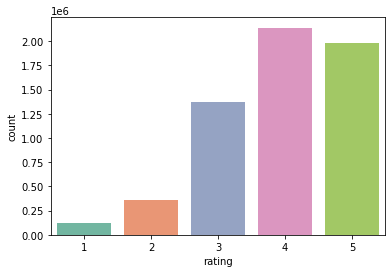

In [7]:
sns.countplot(x = 'rating', data = ratings, palette="Set2")

In [8]:
ratings.rating.value_counts()

4    2139018
5    1983093
3    1370916
2     359257
1     124195
Name: rating, dtype: int64

In [9]:
ratings.user_id.value_counts()

30944    200
12874    200
52036    199
28158    199
12381    199
        ... 
51725     21
32128     21
40753     21
43675     20
34590     19
Name: user_id, Length: 53424, dtype: int64

### 'books' dataset

In [10]:
books.isnull().sum()

book_id                         0
goodreads_book_id               0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

###### We see that there are several columns that have missing values and the most importantly the 'isbn' and  'isbn13' have missing records in them. So now as these are unique labels and have some missing data, applying fillna or any other techniques wont be helpful. So I will take the 'book_id' as the primary key and merge and groupby accordingly through that column.

In [11]:
pd.set_option('display.max_columns', None)
print("'books' dataset shape ------> {}".format(books.shape))
books.head()

'books' dataset shape ------> (10000, 23)


book_id  goodreads_book_id  best_book_id  work_id  books_count       isbn  \
0        1            2767052       2767052  2792775          272  439023483   
1        2                  3             3  4640799          491  439554934   
2        3              41865         41865  3212258          226  316015849   
3        4               2657          2657  3275794          487   61120081   
4        5               4671          4671   245494         1356  743273567   

             isbn13                      authors  original_publication_year  \
0 9780439023480.000              Suzanne Collins                   2008.000   
1 9780439554930.000  J.K. Rowling, Mary GrandPré                   1997.000   
2 9780316015840.000              Stephenie Meyer                   2005.000   
3 9780061120080.000                   Harper Lee                   1960.000   
4 9780743273560.000          F. Scott Fitzgerald                   1925.000   

                             original_title  \
0                          The Hunger Games   
1  Harry Potter and the Philosopher's Stone   
2                                  Twilight   
3                     To Kill a Mockingbird   
4                          The Great Gatsby   

                                               title language_code  \
0            The Hunger Games (The Hunger Games, #1)           eng   
1  Harry Potter and the Sorcerer's Stone (Harry P...           eng   
2                            Twilight (Twilight, #1)         en-US   
3                              To Kill a Mockingbird           eng   
4                                   The Great Gatsby           eng   

   average_rating  ratings_count  work_ratings_count  work_text_reviews_count  \
0           4.340        4780653             4942365                   155254   
1           4.440        4602479             4800065                    75867   
2           3.570        3866839             3916824                    95009   
3           4.250        3198671             3340896                    72586   
4           3.890        2683664             2773745                    51992   

   ratings_1  ratings_2  ratings_3  ratings_4  ratings_5  \
0      66715     127936     560092    1481305    2706317   
1      75504     101676     455024    1156318    3011543   
2     456191     436802     793319     875073    1355439   
3      60427     117415     446835    1001952    1714267   
4      86236     197621     606158     936012     947718   

                                           image_url  \
0  https://images.gr-assets.com/books/1447303603m...   
1  https://images.gr-assets.com/books/1474154022m...   
2  https://images.gr-assets.com/books/1361039443m...   
3  https://images.gr-assets.com/books/1361975680m...   
4  https://images.gr-assets.com/books/1490528560m...   

                                     small_image_url  
0  https://images.gr-assets.com/books/1447303603s...  
1  https://images.gr-assets.com/books/1474154022s...  
2  https://images.gr-assets.com/books/1361039443s...  
3  https://images.gr-assets.com/books/1361975680s...  
4  https://images.gr-assets.com/books/1490528560s...

In [12]:
# Code for checking if the 'goodreads_book_id' and 'best_book_id' are same or not?

count = 0
for i in range(len(books)):
    if books.goodreads_book_id[i] != books.best_book_id[i]:
        count += 1

In [13]:
print(count)

241


##### We see that the 'goodreads_book_id' and 'best_book_id' not the same

##### and there are 10000 unique books with 22 other features

## Preprocessing our dataset

In [14]:
ratings.shape

(5976479, 3)

In [15]:
val = (5976479, 3)

In [16]:
ratings.head()

user_id  book_id  rating
0        1      258       5
1        2     4081       4
2        2      260       5
3        2     9296       5
4        2     2318       3

In [17]:
ratings.user_id.value_counts()

30944    200
12874    200
52036    199
28158    199
12381    199
        ... 
51725     21
32128     21
40753     21
43675     20
34590     19
Name: user_id, Length: 53424, dtype: int64

In [18]:
max(ratings.user_id)

53424

In [19]:
# Here it is applied
value_user = ratings.user_id.value_counts()

ratings = ratings[ratings['user_id'].isin(value_user[value_user >= 120].index)]

In [20]:
print('Previous Shape of rating : {}'.format(val))
print('Current Shape of rating : {}'.format(ratings.shape))
print('Data reduced = {}'.format(val[0] - ratings.shape[0]))

Previous Shape of rating : (5976479, 3)
Current Shape of rating : (2654638, 3)
Data reduced = 3321841


##### Now I will merge the ratings and the books dataset on the 'book_id' column as that will act as a primary key for merging both the datasets.

In [21]:
books.shape, ratings.shape

((10000, 23), (2654638, 3))

In [22]:
books.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')

In [23]:
mixed_dataset = pd.merge(ratings, books, on = 'book_id')

# i will drop the not required columns

columns_to_drp = ['goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url']


mixed_dataset = mixed_dataset.drop(columns_to_drp, axis= 1)

In [24]:
mixed_dataset.shape

(2654638, 4)

In [25]:
mixed_dataset.head()

user_id  book_id  rating                            title
0        4       70       4  Ender's Game (Ender's Saga, #1)
1       31       70       5  Ender's Game (Ender's Saga, #1)
2      202       70       5  Ender's Game (Ender's Saga, #1)
3      319       70       5  Ender's Game (Ender's Saga, #1)
4      332       70       4  Ender's Game (Ender's Saga, #1)

In [26]:
mixed_dataset.isnull().sum()

user_id    0
book_id    0
rating     0
title      0
dtype: int64

##### Now I will group them on the basis of title and rating and get the totalrating counts for each of the books accordingly.

In [27]:
total_book_rating_count =( mixed_dataset.groupby(by = ['title'])['rating'].count().reset_index().rename(columns = {'rating': 'totalRatingCount'}) )
total_book_rating_count.head()

title  totalRatingCount
0           Angels (Walsh Family, #3)               114
1                           #GIRLBOSS                61
2                        'Salem's Lot              2452
3            'Tis (Frank McCourt, #2)               383
4  1,000 Places to See Before You Die               199

In [28]:
# Here i have merged "mixed_dataset" and "total_book_rating_count" datasets to proceed with the pivot table.

rating_with_totalRatingCount = mixed_dataset.merge(total_book_rating_count, left_on = 'title', right_on = 'title', how = 'left')
rating_with_totalRatingCount.head()

user_id  book_id  rating                            title  totalRatingCount
0        4       70       4  Ender's Game (Ender's Saga, #1)              4281
1       31       70       5  Ender's Game (Ender's Saga, #1)              4281
2      202       70       5  Ender's Game (Ender's Saga, #1)              4281
3      319       70       5  Ender's Game (Ender's Saga, #1)              4281
4      332       70       4  Ender's Game (Ender's Saga, #1)              4281

In [29]:
rating_with_totalRatingCount.shape

(2654638, 5)

In [30]:
val = (4615637, 5)

##### For all the records in the 'rating_with_totalRatingCount' dataset, i will set a threshold value, and all the records below that value will be excluded from my dataset.

In [31]:
popularity_threshold = 1000

rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')

In [32]:
print('"rating_popular_book" dataset shape before threshold-----> {}'.format(val))
print('\n')
print('"rating_popular_book" dataset shape after threshold of 1000-----> {}'.format(rating_popular_book.shape))
print('\n')
print('value of threshold set to consider-----> {}'.format(popularity_threshold))

"rating_popular_book" dataset shape before threshold-----> (4615637, 5)


"rating_popular_book" dataset shape after threshold of 1000-----> (1187952, 5)


value of threshold set to consider-----> 1000


#### Making the Pivot table for the collaborative filtering recommendation system with the usage of K-nearest Neighbours.

In [33]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [34]:
rating_popular_book = rating_popular_book.drop_duplicates(['user_id', 'title'])

rating_popular_book_pivot = rating_popular_book.pivot(index = 'title', columns = 'user_id', values = 'rating').fillna(0)

rating_popular_book_matrix = csr_matrix(rating_popular_book_pivot.values)

In [35]:
# All the unique ids with the respective book titles have been represented in this pivot table.

rating_popular_book_pivot.head()

user_id                                    4      7      9      10     11     \
title                                                                          
'Salem's Lot                               0.000  0.000  0.000  0.000  0.000   
11/22/63                                   0.000  0.000  0.000  0.000  0.000   
1984                                       4.000  5.000  5.000  0.000  0.000   
2001: A Space Odyssey (Space Odyssey, #1)  0.000  0.000  0.000  0.000  0.000   
A Child Called "It" (Dave Pelzer #1)       4.000  0.000  0.000  0.000  0.000   

user_id                                    22     23     24     27     28     \
title                                                                          
'Salem's Lot                               4.000  0.000  0.000  0.000  0.000   
11/22/63                                   0.000  0.000  0.000  0.000  0.000   
1984                                       0.000  0.000  0.000  0.000  0.000   
2001: A Space Odyssey (Space Odyssey, #1)  0.000  0.000  0.000  0.000  0.000   
A Child Called "It" (Dave Pelzer #1)       0.000  0.000  0.000  0.000  0.000   

user_id                                    31     32     35     36     40     \
title                                                                          
'Salem's Lot                               0.000  0.000  0.000  0.000  0.000   
11/22/63                                   0.000  0.000  0.000  0.000  0.000   
1984                                       4.000  0.000  0.000  3.000  4.000   
2001: A Space Odyssey (Space Odyssey, #1)  0.000  0.000  0.000  0.000  0.000   
A Child Called "It" (Dave Pelzer #1)       0.000  0.000  0.000  0.000  0.000   

user_id                                    41     44     47     49     54     \
title                                                                          
'Salem's Lot                               0.000  0.000  0.000  0.000  0.000   
11/22/63                                   0.000  0.000  0.000  0.000  0.000   
1984                                       0.000  0.000  0.000  4.000  0.000   
2001: A Space Odyssey (Space Odyssey, #1)  0.000  0.000  0.000  0.000  0.000   
A Child Called "It" (Dave Pelzer #1)       0.000  0.000  0.000  0.000  0.000   

user_id                                    55     60     61     75     79     \
title                                                                          
'Salem's Lot                               0.000  0.000  0.000  0.000  0.000   
11/22/63                                   0.000  0.000  0.000  0.000  0.000   
1984                                       5.000  0.000  0.000  0.000  4.000   
2001: A Space Odyssey (Space Odyssey, #1)  0.000  0.000  0.000  0.000  0.000   
A Child Called "It" (Dave Pelzer #1)       0.000  0.000  0.000  0.000  0.000   

user_id                                    82     88     89     95     104    \
title                                                                          
'Salem's Lot                               0.000  0.000  0.000  0.000  0.000   
11/22/63                                   0.000  0.000  0.000  0.000  0.000   
1984                                       0.000  0.000  0.000  0.000  0.000   
2001: A Space Odyssey (Space Odyssey, #1)  0.000  0.000  0.000  0.000  0.000   
A Child Called "It" (Dave Pelzer #1)       0.000  0.000  0.000  0.000  0.000   

user_id                                    105    107    109    111    116    \
title                                                                          
'Salem's Lot                               0.000  0.000  0.000  0.000  0.000   
11/22/63                                   0.000  0.000  0.000  0.000  0.000   
1984                                       0.000  0.000  0.000  0.000  0.000   
2001: A Space Odyssey (Space Odyssey, #1)  0.000  0.000  0.000  0.000  0.000   
A Child Called "It" (Dave Pelzer #1)       0.000  0.000  0.000  0.000  0.000   

user_id                                    119    124    130    133    14

In [36]:
rating_popular_book_pivot.shape

(526, 19145)

#### Now i will pass the pivot matrix into the Nearest neighbours model to get the recommendations

In [37]:
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute', p=2, n_neighbors = 5, leaf_size = 30)
model_knn.fit(rating_popular_book_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

###### For example i select one of the books randomly from the pivot table and from KNN, it gives me n_neighbours of my choice that are very much recommendable based on the distances.


In [38]:
query_index = np.random.choice(rating_popular_book_pivot.shape[0])

distances, indices = model_knn.kneighbors(rating_popular_book_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 3)

In [39]:
print('The random query index that i got -------> {}'.format(query_index))
print('The name of the book at the random index received is: {}'.format(rating_popular_book_pivot.index[query_index]))

The random query index that i got -------> 23
The name of the book at the random index received is: A Streetcar Named Desire


##### Now I will give the recommendable suggestions to the user based on the random input.

In [41]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(rating_popular_book_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, rating_popular_book_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for A Streetcar Named Desire:

1: The Great Gatsby, with distance of 0.7206007573046751:
2: Death of a Salesman, with distance of 0.7336738654657606:


##### Now lets say if I enter a name of the book, it will give me recommendations

In [42]:
# All the books with indexs that I have.
for i,name in enumerate(list(rating_popular_book_pivot.index)):
    print(i,name)

0 'Salem's Lot
1 11/22/63
2 1984
3 2001: A Space Odyssey (Space Odyssey, #1)
4 A Child Called "It" (Dave Pelzer #1)
5 A Christmas Carol
6 A Clash of Kings  (A Song of Ice and Fire, #2)
7 A Clockwork Orange
8 A Confederacy of Dunces
9 A Dance with Dragons (A Song of Ice and Fire, #5)
10 A Discovery of Witches (All Souls Trilogy, #1)
11 A Farewell to Arms
12 A Feast for Crows (A Song of Ice and Fire, #4)
13 A Game of Thrones (A Song of Ice and Fire, #1)
14 A Heartbreaking Work of Staggering Genius
15 A Light in the Attic
16 A Little Princess
17 A Midsummer Night's Dream
18 A Million Little Pieces
19 A Prayer for Owen Meany
20 A Separate Peace
21 A Short History of Nearly Everything
22 A Storm of Swords (A Song of Ice and Fire, #3)
23 A Streetcar Named Desire
24 A Tale of Two Cities
25 A Thousand Splendid Suns
26 A Time to Kill
27 A Tree Grows in Brooklyn
28 A Visit from the Goon Squad
29 A Walk in the Woods
30 A Walk to Remember
31 A Wizard of Earthsea (Earthsea Cycle, #1)
32 A Wrinkle i

In [43]:
name = input('Please enter the name of a book: ')

index_val = [i for i,x in enumerate(list(rating_popular_book_pivot.index)) if(name == x)]        

print('The book selected is {} which is at index: {}'.format(name, index_val[0]))
print('\n')

distances, indices = model_knn.kneighbors(rating_popular_book_pivot.iloc[index_val[0],:].values.reshape(1, -1), n_neighbors = 3)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for The book selected are:'.format(rating_popular_book_pivot.index[index_val[0]]))
    else:
        print('{0}: {1}, with a distance of {2}:'.format(i, rating_popular_book_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Please enter the name of a book: A Streetcar Named Desire
The book selected is A Streetcar Named Desire which is at index: 23


Recommendations for The book selected are:
1: The Great Gatsby, with a distance of 0.7206007573046751:
2: Death of a Salesman, with a distance of 0.7336738654657606:


# END